# Introduction to Jupyter Notebooks
## With pandas and others

### Installing
You can directly install Jupyter following these [instructions](http://jupyter.org/install), but they recommend installing Python and Jupyter using the [Anaconda](https://www.anaconda.com/downloads) Distribution.

### Run

Open Terminal (Mac/Linux) or Command Prompt (Windows) and type

**_jupyter notebook_**

## Doing some basic analysis

In [2]:
## This should be the first cell
'Hello World'

'Hello World'

In [1]:
123+456

579

In [4]:
test_str = 'qwerty is a bad pass word'
test_str

'qwerty is a bad pass word'

### Pandas or [&#128060; &#128060; &#128060;]
* Simple data frame

In [5]:
# For code writing
from IPython.display import display, HTML
display(HTML(data="""
<style>
    div#notebook-container    { width: 99%; }
    div#menubar-container     { width: 65%; }
    div#maintoolbar-container { width: 99%; }
</style>
"""))

In [7]:
import pandas as pd
import numpy as np

In [8]:
input_lst = [[1,2,3],[4,5,6],[7,8,9], [10,11,12]]
df = pd.DataFrame(input_lst, columns=['A','B','C']) # auto-complete variables
df

,A,B,C
0,1,2,3
1,4,5,6
2,7,8,9
3,10,11,12


* To show how to use Jupyter Notebooks with panda I'm going to be using one of Kaggle's (data science website) titanic dataset.

In [9]:
titanic_df = pd.read_csv('titanic-train.csv')
titanic_df.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
# Quickly checking for NaN entries
print ('Data type:\n', titanic_df.dtypes, sep='')
print ('\nNumber of NaNs\n', titanic_df.apply(lambda x: sum(x.isnull()),axis=0), sep='')
print ('\nData Shape:', titanic_df.shape, 'or', '#Rows:', titanic_df.shape[0],'#Columns:',titanic_df.shape[1])

Data type:
survived      int64
pclass        int64
name         object
sex          object
age         float64
sibsp         int64
parch         int64
ticket       object
fare        float64
cabin        object
embarked     object
dtype: object

Number of NaNs
survived      0
pclass        0
name          0
sex           0
age         177
sibsp         0
parch         0
ticket        0
fare          0
cabin       687
embarked      2
dtype: int64

Data Shape: (891, 11) or #Rows: 891 #Columns: 11


In [11]:
## Mapping variable to another
titanic_df['survived'] = titanic_df['survived'].map({0:'No', 1:'Yes'})

----
** Looking at numerical data **

In [12]:
titanic_df.describe()

,pclass,age,sibsp,parch,fare
count,891.000000,714.000000,891.000000,891.000000,891.000000
mean,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,20.125000,0.000000,0.000000,7.910400
50%,3.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,38.000000,1.000000,0.000000,31.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
print(titanic_df['age'].mean())
print(titanic_df['age'].quantile([.33, .01, .90]))

29.69911764705882
0.33    23.0
0.01     1.0
0.90    50.0
Name: age, dtype: float64


----
** Looking at text data **

In [14]:
titanic_df.describe(include = ['O'])

,survived,name,sex,ticket,cabin,embarked
count,891,891,891,891,204,889
unique,2,891,2,681,147,3
top,No,"Palsson, Miss. Stina Viola",male,347082,C23 C25 C27,S
freq,549,1,577,7,4,644


In [15]:
print(titanic_df['cabin'].unique())
print(titanic_df['cabin'].value_counts())

[nan 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78' 'D33'
 'B30' 'C52' 'B28' 'C83' 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26' 'C110'
 'B58 B60' 'E101' 'F E69' 'D47' 'B86' 'F2' 'C2' 'E33' 'B19' 'A7' 'C49' 'F4'
 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78' 'D35' 'C87' 'B77' 'E67'
 'B94' 'C125' 'C99' 'C118' 'D7' 'A19' 'B49' 'D' 'C22 C26' 'C106' 'C65'
 'E36' 'C54' 'B57 B59 B63 B66' 'C7' 'E34' 'C32' 'B18' 'C124' 'C91' 'E40'
 'T' 'C128' 'D37' 'B35' 'E50' 'C82' 'B96 B98' 'E10' 'E44' 'A34' 'C104'
 'C111' 'C92' 'E38' 'D21' 'E12' 'E63' 'A14' 'B37' 'C30' 'D20' 'B79' 'E25'
 'D46' 'B73' 'C95' 'B38' 'B39' 'B22' 'C86' 'C70' 'A16' 'C101' 'C68' 'A10'
 'E68' 'B41' 'A20' 'D19' 'D50' 'D9' 'A23' 'B50' 'A26' 'D48' 'E58' 'C126'
 'B71' 'B51 B53 B55' 'D49' 'B5' 'B20' 'F G63' 'C62 C64' 'E24' 'C90' 'C45'
 'E8' 'B101' 'D45' 'C46' 'D30' 'E121' 'D11' 'E77' 'F38' 'B3' 'D6' 'B82 B84'
 'D17' 'A36' 'B102' 'B69' 'E49' 'C47' 'D28' 'E17' 'A24' 'C50' 'B42' 'C148']
C23 C25 C27    4
B96 B98        4
G6        

----
** Both **

In [16]:
titanic_df.describe(include = 'all')

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
count,891,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,2,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,No,NaN,"Palsson, Miss. Stina Viola",male,NaN,NaN,NaN,347082,NaN,C23 C25 C27,S
freq,549,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,NaN,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,NaN,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,NaN,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,NaN,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,NaN,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,NaN,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


----
** Searching Text **

In [17]:
titanic_df[(titanic_df['name'].str.contains('Anna')) & (titanic_df['pclass']==3)]

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
22,Yes,3,"McGowan, Miss. Anna ""Annie""",female,15.0,0,0,330923,8.0292,NaN,Q
106,Yes,3,"Salkjelsvik, Miss. Anna Kristine",female,21.0,0,0,343120,7.6500,NaN,S
119,No,3,"Andersson, Miss. Ellis Anna Maria",female,2.0,4,2,347082,31.2750,NaN,S
128,Yes,3,"Peter, Miss. Anna",female,NaN,1,1,2668,22.3583,F E69,C
141,Yes,3,"Nysten, Miss. Anna Sofia",female,22.0,0,0,347081,7.7500,NaN,S
167,No,3,"Skoog, Mrs. William (Anna Bernhardina Karlsson)",female,45.0,1,4,347088,27.9000,NaN,S
300,Yes,3,"Kelly, Miss. Anna Katherine ""Annie Kate""",female,NaN,0,0,9234,7.7500,NaN,Q
423,No,3,"Danbom, Mrs. Ernst Gilbert (Anna Sigrid Maria ...",female,28.0,1,1,347080,14.4000,NaN,S
677,Yes,3,"Turja, Miss. Anna Sofia",female,18.0,0,0,4138,9.8417,NaN,S
786,Yes,3,"Sjoblom, Miss. Anna Sofia",female,18.0,0,0,3101265,7.4958,NaN,S


----
** Grouping data **

In [18]:
titanic_df_sex = titanic_df.groupby('sex') # Grouping data by sex

for key in titanic_df_sex.groups.keys():
    tmp_df = titanic_df_sex.get_group(key)
    display(tmp_df.head())

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
1,Yes,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,Yes,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,Yes,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,Yes,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,No,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
4,No,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,No,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,No,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,No,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


----
** Simple plotting data (Seaborn) **

In [19]:
# Plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

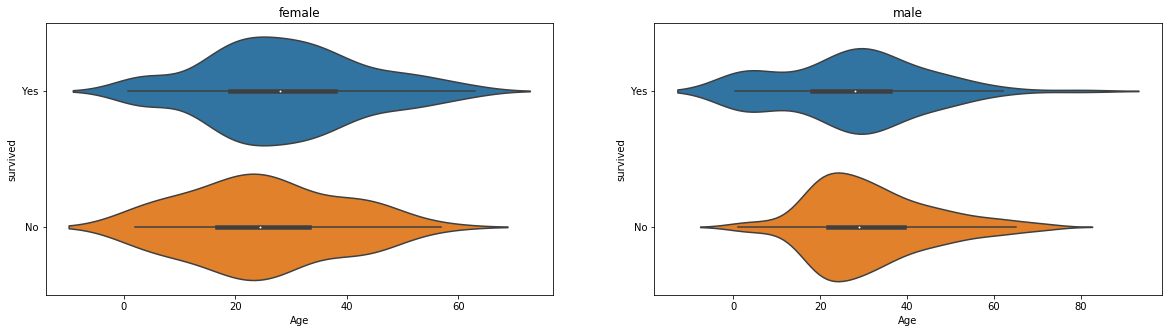

In [20]:
# Plotting the data by sex
fig = plt.figure(figsize=(20, 5))

img_i = 1
for key in titanic_df_sex.groups.keys():
    ax = fig.add_subplot(1,2,img_i)
    tmp_df = titanic_df_sex.get_group(key)
    ax.set_title(key)
    ax = sns.violinplot(x='age', y='survived', data=tmp_df, order=['Yes', 'No'])
    ax.set_xlabel('Age')
    img_i += 1
    
plt.show()

In [21]:
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<a style="font-size:100%;" href="javascript:code_toggle()">Show/Hide Code</a>''')

In [2]:
from ipywidgets import widgets
from IPython.display import clear_output

In [3]:
# Dropdown boxes for user to select the product, rag & connectivity 
select_lan = widgets.Dropdown(description='Select your favourite coding language:')
select_lan.options = ['Python', 'R', 'Ruby', 'Java', 'C++']
display(select_lan)

button = widgets.Button(description='Onwards!')
display(button)

def print_values(b):
    clear_output()
    if select_lan.value == 'Python':
        print ('You have chosen wisely - :)')
    else:
        print ('Did you mean Python?')
    

button.on_click(print_values)

You have chosen wisely - :)


![](./giphy.gif)

# End